#### Submitted by : -
**Name :** Mikhil Pavu Paul
**UIN:** 656765869

#### Q1: Load all data and vectorize it with tf-idf vectorization.

In [1]:
import pandas as pd

df_song = pd.read_csv("songdata.csv")

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vect= TfidfVectorizer(min_df=5,stop_words = 'english')
X = vect.fit_transform(df_song.text)
X.shape

(57650, 22557)

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
clusters = kmeans.fit_predict(X)
clusters

array([0, 2, 0, ..., 2, 0, 1])

(array([ 37505.,      0.,      0.,      0.,      0.,   5217.,      0.,
             0.,      0.,  14928.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

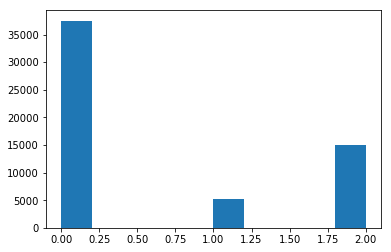

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(clusters)

##### Analysis : - 
* Cluster 0 is having the most documents.
* Cluster 2 have the second highest number of documents and cluster 1 has the least.
* This infers that majority of the songs have similar features and they all have been clustered in cluster 0.

#### Q2: Apply a clustering algorithm with 3 clusters and find top 5 closest documents to each cluster’s centroid. Analyze your result.

In [9]:
dist = kmeans.transform(X)
for i in range(dist.shape[1]):
    dist_np = np.array(dist[:,i])
    index = np.argsort(dist_np)[:5]
    print("Cluster: %d"%i,"\n\n",pd.concat([df_song.artist.iloc[index],df_song.text.iloc[index]],axis = 1),"\n")


Cluster: 0 

                    artist                                               text
4540                Drake  Know you've been hurt by someone else  \nI can...
13907           New Order  Some people get up at the break of day  \nGott...
27707  Christina Aguilera  Hey there boy did ya happen to know  \nWhereve...
17260       Reba Mcentire  Another morning, another day in your life  \nW...
26338        Bonnie Raitt  Told me baby  \nYou were just too tired to try... 

Cluster: 1 

               artist                                               text
27550    Chris Brown  I know why you want love in the middle of the ...
12310        Madonna  It's so hard to be someone,  \nIt's so hard to...
19864             U2  I talk to you  \nYou walk away  \nYou're still...
1175      Beach Boys  When you say you do  \nMakes me want to spend ...
7060   Gloria Gaynor  Give you love, give you love  \nI'm gonna give... 

Cluster: 2 

                artist                                       

##### Analysis : -
* From Cluster 1, its observed that lyrics contain the frequently occuring word 'Love' implying that the songs with romance theme has been captured by this cluster.
* Other Clusters have all captured similar words used in different songs.

#### Q3: Reduce the dimension to 50 components using LSA and report top 5 features per component. Analyze your result.

In [7]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)


In [8]:
print(Z.shape)
lsa.components_.shape

(57650, 50)


(50, 22557)

In [24]:
words = np.array(vect.get_feature_names())
for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i]).argsort()[::-1]
    print(words[order[:5]])

['love' 'don' 'know' 'll' 'just']
['love' 'don' 'got' 'heart' 'gonna']
['oh' 'baby' 'yeah' 'll' 'time']
['oh' 'don' 'want' 'baby' 'know']
['baby' 'don' 'oh' 'want' 'know']
['ll' 'la' 'baby' 'got' 'yeah']
['la' 'll' 'got' 'baby' 'yeah']
['want' 'don' 'yeah' 'know' 've']
['yeah' 'll' 'let' 'gonna' 'want']
['let' 'll' 'want' 'don' 'yeah']
['got' 've' 'let' 'yeah' 'don']
['gonna' 'yeah' 've' 'know' 'oh']
['gonna' 'll' 'christmas' 'yeah' 'like']
['christmas' 'like' 'don' 'chorus' 'got']
['christmas' 'time' 'don' 'come' 'just']
['know' 'chorus' 'christmas' 'away' 'hey']
['come' 'know' 'hey' 'home' 'don']
['hey' 'like' 'say' 'girl' 'chorus']
['time' 'hey' 'heart' 'girl' 'chorus']
['chorus' 'know' 'come' 'wanna' 'man']
['time' 'say' 'girl' 'away' 'way']
['hey' 'girl' 'like' 'feel' 'little']
['chorus' 'need' 'wanna' 'life' 'hey']
['night' 'heart' 'come' 'tonight' 'like']
['wanna' 'need' 'time' 'feel' 'believe']
['away' 'say' 'night' 'tonight' 'need']
['girl' 'need' 'way' 'heart' 'chorus']
['hom

##### Analysis : -
* It's observed that some sets of words do capture some themes of the songs.
* From one of the components above its observed that 'Christmas' and 'Chorus' are together. This can be inferred that this component has captured the christmas theme of the song.
* 'Love' and 'heart' are captured together in another component telling us the romantic theme of the song.
* Most components have captured words such as 'tonight', 'hold', 'feel', 'good', 'love', 'baby' telling us that majority of the songs contains these words as highly occuring terms.

#### Q4: Run a clustering algorithm with 2-10 clusters on low dimension features and select the best number of clusters using elbow method.

In [93]:
from sklearn.cluster import KMeans
inertia =[]

for i in range(2,11):
    kmeans_set = KMeans(i,max_iter=500)
    kmeans_set.fit(Z)
    inertia.append(kmeans_set.inertia_)

print(inertia)

[7161.2548409876672, 6944.1218891019262, 6755.5705800236501, 6598.4246215378853, 6443.437545011293, 6388.3896084065718, 6211.6444135590937, 6101.0127531772887, 6008.7897017194482]


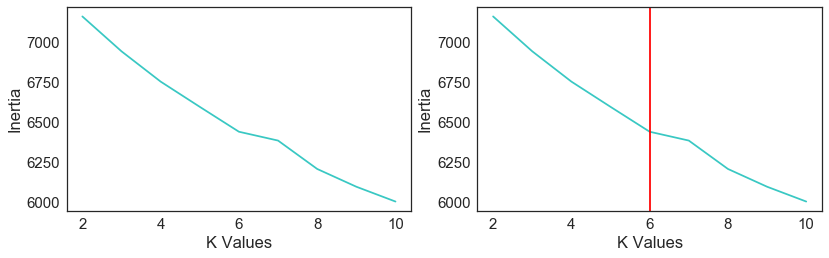

In [215]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.tight_layout()
plt.plot(range(2,11),inertia)

f.add_subplot(1,2,2)
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.tight_layout()
plt.plot(range(2,11),inertia)
plt.axvline(x=6,color="r")

 * It's observed that the **optimal value of K is found to be 6** from the elbow method.

#### Q5: Use the best number of clusters that you have found and find top 5 closest documents to each cluster’s centroid. Compare your result with Q2

In [10]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(6,max_iter=500,n_init=5)
clusters_new = kmeans_new.fit_predict(Z)
clusters_new

array([3, 2, 3, ..., 2, 3, 2])

In [11]:
dist_new = kmeans_new.transform(Z)
for i in range(dist_new.shape[1]):
    dist_np_new = np.array(dist_new[:,i])
    index = np.argsort(dist_np_new)[:5]
    print("Cluster: %d"%i,"\n\n",pd.concat([df_song.artist[index],df_song.text.iloc[index]],axis=1),"\n")


Cluster: 0 

                  artist                                               text
26982       Cat Stevens  [Chorus]  \nLonger boats are coming to win us ...
8345            Incubus  Woke up I wiped the sleepers from my eye  \nLo...
32494      Fall Out Boy  [Originally by Jawbreaker]  \n  \nI have a pre...
51587               Sia  You can be my alphabet  \nAnd I will be your c...
43887  Michael W. Smith  Actions have been justified  \nAll is compromi... 

Cluster: 1 

               artist                                               text
3014     Chuck Berry  Looks like I'll go on through my life bound in...
17113  Rascal Flatts  Can't get enough of this everyday love  \nCan'...
41959      LL Cool J  One shot  \nOh lord  \nYou know, it's gonna be...
14487    Norah Jones  He takes me to the places you and I used to go...
49214     Puff Daddy  I want her to feel it in her chest  \nI want h... 

Cluster: 2 

                   artist                                               t

##### Analysis : -
* In Cluster 1 has captured words like 'Love' and 'feel', implying that this cluster is having songs with romantic theme.
* in Cluster 3, words relating to nature and adventure are captured. 
* Its also interesting to find that 3 songs of the same artist have been captured in the same cluster (Cluster 3).

#### Q6: Reduce dimension to 2 components and find 3 clusters in data and plot them using a scatter plot with different colors.  


In [109]:
lsa2 = TruncatedSVD(2)
Z2 = lsa2.fit_transform(X)
Z2.shape

(57650, 2)

In [112]:
kmeans3 = KMeans(3)
kmeans_lsa = kmeans3.fit_predict(Z2)

In [210]:
import seaborn as sns

#Set font size
sns.set(font_scale=1.5)
#set style of plots
sns.set_style('white')
#define a custom palette
customPalette = ['#39C8C3', 'orchid', '#FFB139']
sns.set_palette(customPalette)

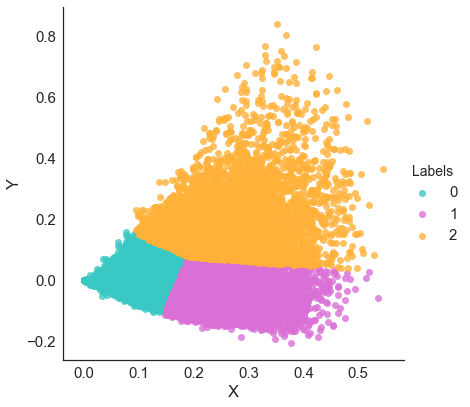

In [213]:
plot_df = pd.concat([pd.DataFrame(Z2,columns=["X","Y"]),pd.DataFrame(kmeans_lsa,columns=["Labels"])],axis=1)
facet = sns.lmplot(data=plot_df, x='X', y='Y', hue='Labels', 
                   fit_reg=False, legend=True, legend_out=True,size = 6)

##### Analysis : -
* It can be observed that cluster 2 is having the highest count. A few documents are seemed to be driffted away from the centeroid.
* Cluster 1 is having the second highest count of documents with slight dispersion.
* Cluster 0 has the lowest count of documents with no dispersion.
* These results matches our findings from the histogram plot of Q2.
* All 3 clusters are very close to each other. This infers that majority of the songs contain words that are occuring almost the same amount of time. Or in another words, all songs exhibit high similarity.

#### Conclusion : -
* Using LDA of 50 Components, the most frequent occuring words were identified and thus helped in infering the tone of most songs.
* Used Elbow method to find the optimum number of clusters.
* By analysing various clusters, songs of similar themes were observed to be in the same clusters.